In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = 'CreditScoring.csv'

df = pd.read_csv(data)
df.columns = df.columns.str.lower()
df.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

### Data Preprocessing

Mapping for categorical variables.

In [3]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)

In [4]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [5]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [6]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)


In [7]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [8]:
df = df[df.status != 'unk'].reset_index(drop=True)

A more meaningful description.

In [9]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4454.0,4454.0,4454.0,4454.0,4420.0,4407.0,4436.0,4454.0,4454.0
mean,8.0,46.0,37.0,56.0,131.0,5404.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11574.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1117.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


### Data Splitting

In [10]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

del df_train['status']
del df_val['status']
del df_test['status']

In [11]:
from sklearn.feature_extraction import DictVectorizer

# Filling missing values with 0
dict_train = df_train.fillna(0).to_dict(orient='records')
dict_val = df_val.fillna(0).to_dict(orient='records')

In [12]:
dict_train[0]

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [13]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

In [36]:
X_train[0]

array([3.6e+01, 1.0e+03, 1.0e+04, 0.0e+00, 7.5e+01, 0.0e+00, 0.0e+00,
       1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 1.4e+03, 1.0e+00, 0.0e+00, 1.0e+01,
       3.6e+01])

### Gradient Boosting and XGBoost

- Gradient boosting vs random forest
- Installing XGBoost
- Training the first model
- Performance monitoring
- Parsing xgboost's monitoring output

Note:

We removed feature names

It was 

```python
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
```

Now it's

```python
dtrain = xgb.DMatrix(X_train, label=y_train)
```


In [37]:
import xgboost as xgb

features = dv.get_feature_names_out()
# dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
# dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [38]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [39]:
y_pred = model.predict(dval)
y_pred[:10]

array([0.08926772, 0.0468099 , 0.09692743, 0.17261842, 0.05435968,
       0.12576081, 0.08033007, 0.61870354, 0.486538  , 0.04056795],
      dtype=float32)

In [40]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_val, y_pred)

0.8152745150274878

In [41]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [42]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=10,
                  evals=watchlist)

In [43]:
s = output.stdout

print(s[:100])

[0]	train-auc:0.86300	val-auc:0.76818
[10]	train-auc:0.95002	val-auc:0.81558
[20]	train-auc:0.97316	


In [44]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [45]:
df_score = parse_xgb_output(output)

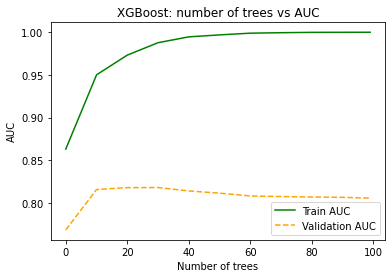

In [46]:
plt.plot(df_score.num_iter, df_score.train_auc, color="green", linestyle="solid", label='Train AUC')
plt.plot(df_score.num_iter, df_score.val_auc, color="orange", linestyle="dashed", label='Validation AUC')
plt.legend()

plt.title('XGBoost: number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_xgb_default.svg')

plt.show()

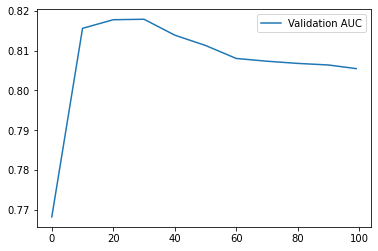

In [47]:
plt.plot(df_score.num_iter, df_score.val_auc, label='Validation AUC')
plt.legend()

### ML Package with BentoML

In [48]:
import bentoml

bentoml.xgboost.save_model("credit_scoring_model", model,
                        custom_objects={
                            "dictVectorizer": dv
                            })

Model(tag="credit_scoring_model:bp7qelcpdknyi7fs", path="C:\Users\rizdi\bentoml\models\credit_scoring_model\bp7qelcpdknyi7fs\")

In [ ]:
### If prediction on batches is preferred

bentoml.xgboost.save_model("credit_scoring_model", model,
                            custom_objects={
                                "dictVectorizer": dv
                            },
                            signatures={
                                "predict": {
                                    "batchable": True,
                                    "batch_dim": 0,
                                }
                            }
                        )

### Testing

In [49]:
import json

request = df_test.iloc[0].to_dict()
print(json.dumps(request, indent=2))

TypeError: Object of type int64 is not JSON serializable

In [50]:
request

{'seniority': 3,
 'home': 'owner',
 'time': 36,
 'age': 26,
 'marital': 'single',
 'records': 'no',
 'job': 'freelance',
 'expenses': 35,
 'income': 0.0,
 'assets': 60000.0,
 'debt': 3000.0,
 'amount': 800,
 'price': 1000}

### Summary and Extras

- Decision tree decide which class that data belongs to by following through if-else-then rule mechanism
- A split with the least impurity (measured in gini or entropy) is . This, however, leaves a generalization gap among train, validation and test (overfitting). That is the reason the decision tree is controlled with `max_depth` and `min_samples_leaf`.
- Random forest is an ensemble of many decision tree in diversity. You can perceive it as "an expert board that gathers decisions based on their own different considerations"
- Meanwhile, gradient boosting gradually improves the model in sequential steps: it makes uses of the error made from the previous model. XGBoost is the implementation of gradient boosting. 